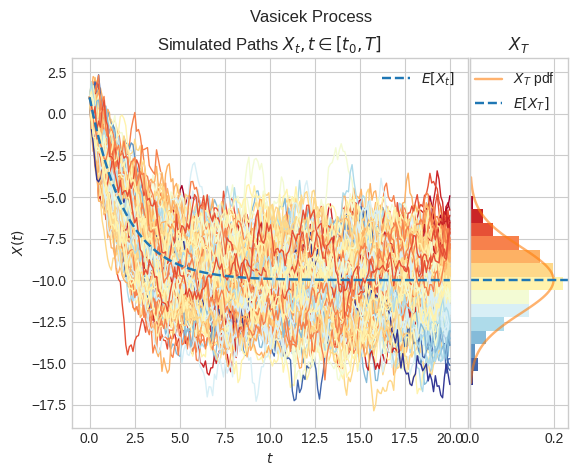

In [1]:
%pip install aleatory
from aleatory.processes import Vasicek
process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

## Definition

The Vasicek model specifies that the instantaneous interest rate is defined by a stochastic process which can be defined by the following Stochastic Differential Equation (SDE)


\begin{equation}
dX_t = \theta (\mu - X_t) dt + \sigma dW_t, \quad t >0,
\end{equation}


with initial condition  $X_0 =x_0\in\mathbb{R}$, and where $W_t$ is a standard Brownian motion, and the three parameters are constants:

- $\theta>0$ : speed or mean reversion coefficient
- $\mu \in \mathbb{R}$ : long term mean
- $\sigma>0$ : volatility



In order to find the solution to this SDE, let us set the function $f(t,x) = x e^{\theta t}$. Then, Ito's formula implies


\begin{align*}
X_te^{\theta t} &= x_0 +\int_0^t X_s \theta e^{\theta s}ds + \int_0^t e^{\theta s}dX_s \\
& = x_0 + \int_0^t \left[ \theta X_s  e^{\theta s}  +\theta e^{\theta s}(\mu - X_s)\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \int_0^t \left[ \theta e^{\theta s}\mu\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \mu(e^{\theta t} - 1) + \int_0^t e^{\theta s}\sigma dW_s.
\end{align*}


Thus

\begin{equation}
X_t = x_0e^{-\theta t} +  \mu(1- e^{-\theta t})  + \sigma \int_0^t e^{-\theta (t-s)}dW_s.
\end{equation}

### Expectation and Variance

For each $t>0$, the conditional marginal $X_t|X_0$ from a Vacisek process satisfies

\begin{equation*}
\mathbf{E} [X_t ] = \mathbb{E}[X_t|X_0] = x_0e^{-\theta t} +  \mu(1- e^{-\theta t}),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbb{Var} [X_t |X_0] =  \frac{\sigma^2}{ 2\theta} (1- e^{-2\theta t}).
\end{equation*}

To obtain the expectation we simply use the linearity of the expectation and the fact that the Ito integral in equation (2) is a martingale. Similarly, for the variance we  use basic properties of the variance and the isometry property of the Ito integral.

### Python Implementation

So, for given $x_0, \theta>0, \mu, \sigma>0$ and $t,s>0$ You will implement the above formulas for the expectation, variance, and covariance as follows.

### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`.

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

In [2]:
from scipy.stats import norm
import numpy as np
#### Calculate Mean and Varaince of Normal Distribution with initial values of X0,mu,sigma,t

def vasicek_mean(x0, theta, mu, t):
    return x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def vasicek_variance(sigma, theta, t):
    return (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))


### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \theta,  \mu, \sigma, x_0) = \dfrac{1}{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})} \sqrt{2 \pi }}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x- [x_0e^{-\theta t} +  \mu(1- e^{-\theta t})] }{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

First we consider the process
`Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)` and plot the marginal density of $X_1$.
Note that the mean is still far from the long term mean $\mu=10$. Code it and plot the Graph of Distribution
'''
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
''''

In [7]:
'''process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
'''''
##Plot the Graph

def plot_marginal_distribution(theta, mu, sigma, x0, t):
    mean = vasicek_mean(x0, theta, mu, t)
    variance = vasicek_variance(sigma, theta, t)
    stddev = np.sqrt(variance)

    x = np.linspace(mean - 4 * stddev, mean + 4 * stddev, 1000)
    pdf = norm.pdf(x, loc=mean, scale=stddev)

    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, label=f'$t = {t}$')
    plt.title(f'Marginal PDF of Vasicek Process at $t={t}$')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.grid(True)
    plt.legend()
    plt.show()


**Plot Graphs** Dsitrbution in which Vary one at time ( sigma,mu,theta ,t ) . Vary one value taking  initial values of sigma,mu,theta,t

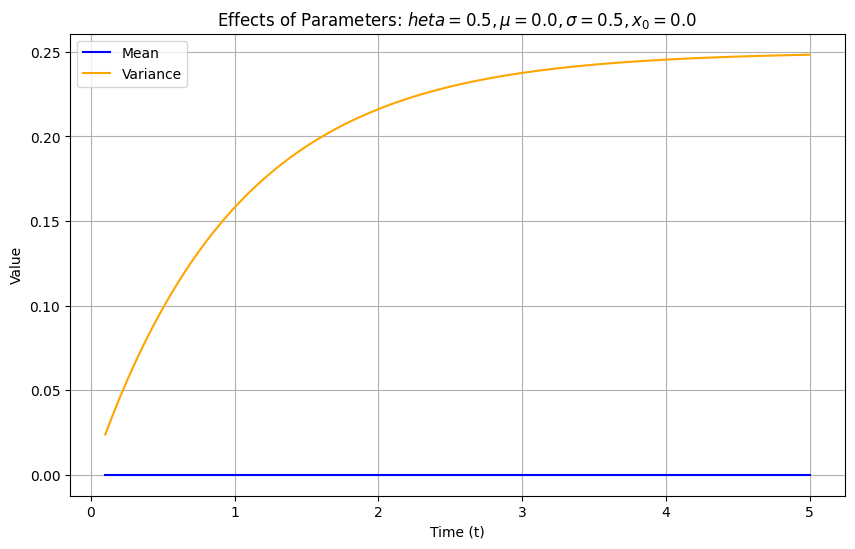

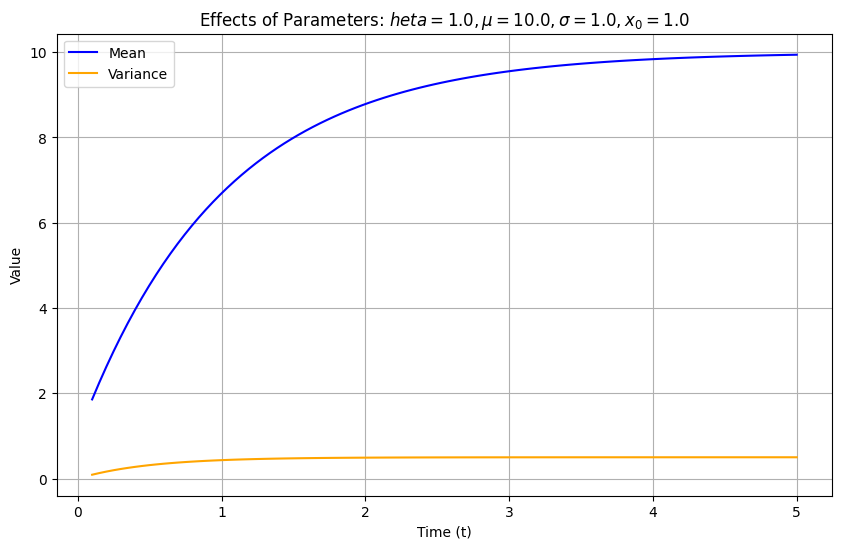

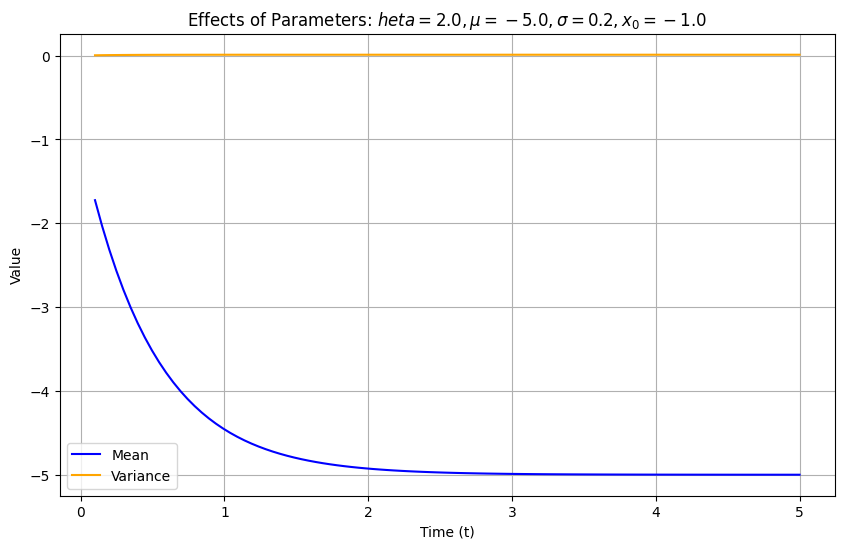

In [11]:
ts = np.linspace(0.1, 5, 100)
params = [
    {"theta": 0.5, "mu": 0.0, "sigma": 0.5, "x0": 0.0},
    {"theta": 1.0, "mu": 10.0, "sigma": 1.0, "x0": 1.0},
    {"theta": 2.0, "mu": -5.0, "sigma": 0.2, "x0": -1.0},
]

for param in params:
    theta, mu, sigma, x0 = param.values()
    means = [vasicek_mean(x0, theta, mu, t) for t in ts]
    variances = [vasicek_variance(sigma, theta, t) for t in ts]

    plt.figure(figsize=(10, 6))
    plt.plot(ts, means, label='Mean', color='blue')
    plt.plot(ts, variances, label='Variance', color='orange')
    plt.title(f'Effects of Parameters: $\theta={theta}, \mu={mu}, \sigma={sigma}, x_0={x0}$')
    plt.xlabel('Time (t)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

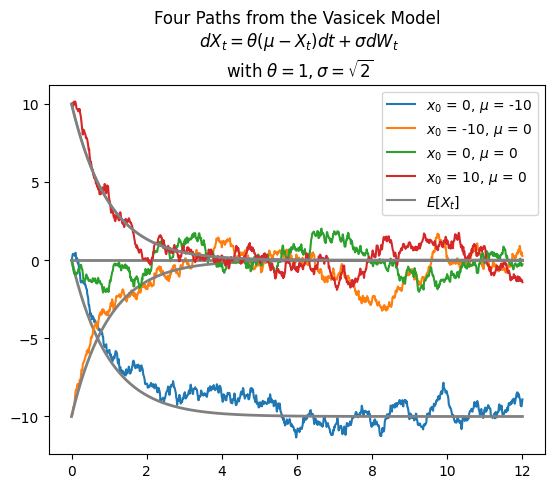

In [12]:
#from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

**Simulation**

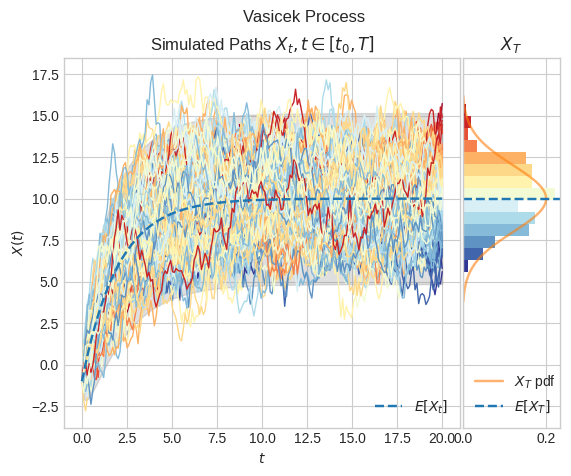

In [13]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

#### The parameter $\theta$ determines the Speed of Convergence

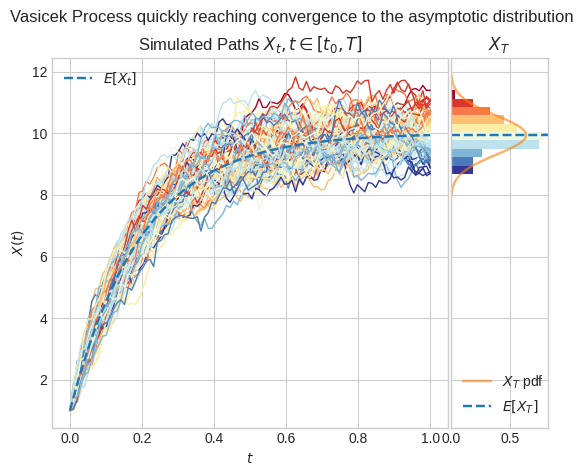

In [14]:
# from aleatory.processes import Vasicek
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

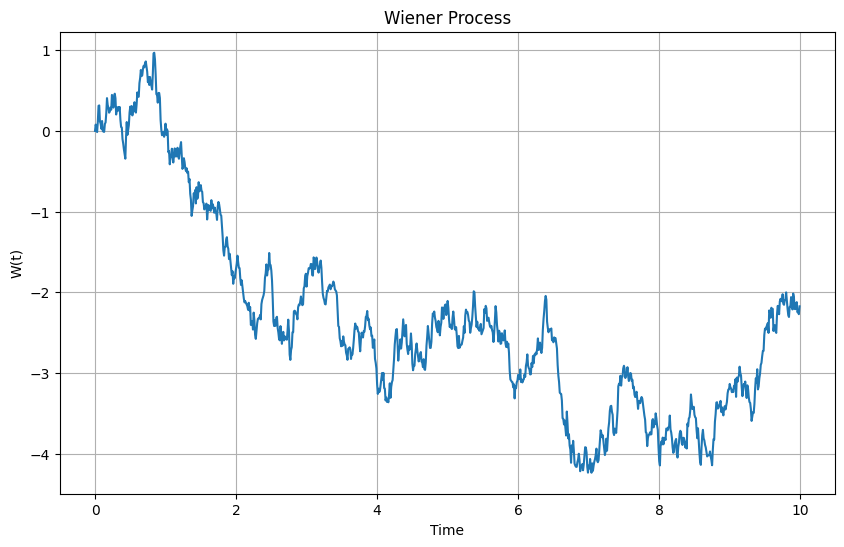

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

#Plot different no. of paths by varying parameter and time interval!